# **ACTIVIDAD 2b -Mamdani docente-**

1. Un docente le solicita que automatice el proceso de puntuación de su materia. La materia consta de un único examen, puntuado entre 0 y 100, y además una nota de concepto con tres valores (regular, bueno, excelente). Diseñe un FIS Mamdani que permita modificar la nota final (1-10) combinando ambas variables de entrada.

2. Recuerde que la nota de concepto sólo modula la nota del examen. Es decir, la nota del examen tiene más peso en el resultado final que el concepto. No obstante, la nota de concepto debe influir en la puntuación final.

3. Explicite las reglas que ha elegido para esta tarea, y dé ejemplos de valores de entrada y salida. Defina los valores máximos y mínimos posibles para cada variable.

Nota Final: 6.70


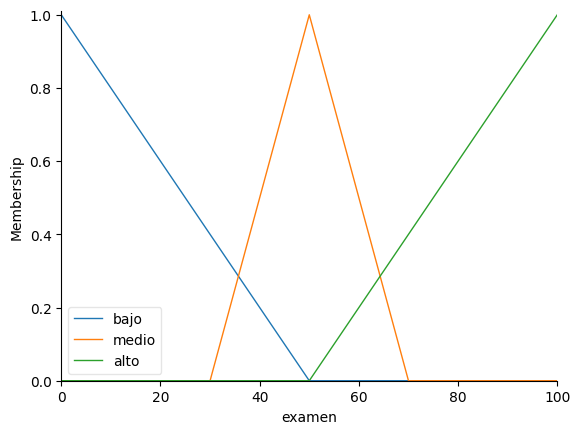

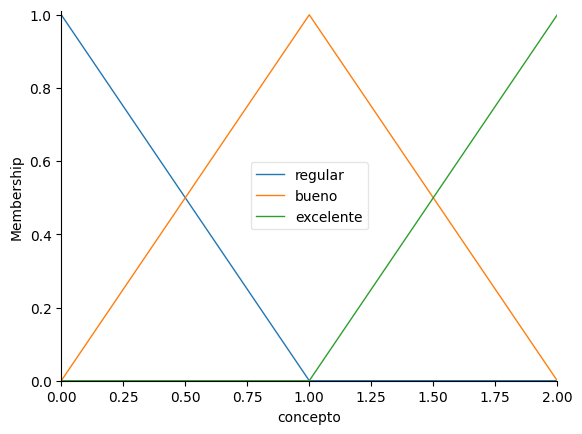

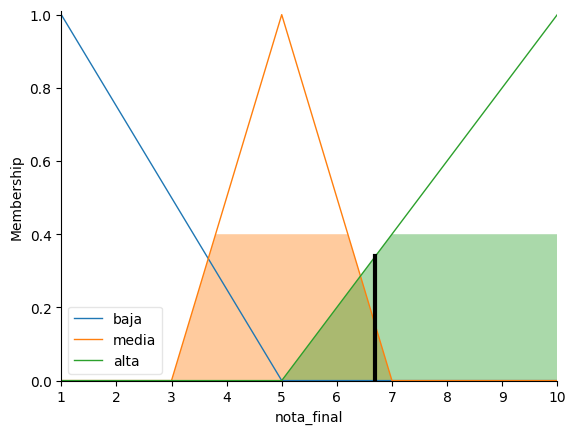

In [24]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definir las variables difusas de entrada
examen = ctrl.Antecedent(np.arange(0, 101, 1), 'examen')
concepto = ctrl.Antecedent(np.arange(0, 3, 1), 'concepto')

# Definir la variable difusa de salida
nota_final = ctrl.Consequent(np.arange(1, 11, 1), 'nota_final')

# Funciones de membresía para 'examen'
examen['bajo'] = fuzz.trimf(examen.universe, [0, 0, 50])
examen['medio'] = fuzz.trimf(examen.universe, [30, 50, 70])
examen['alto'] = fuzz.trimf(examen.universe, [50, 100, 100])

# Funciones de membresía para 'concepto'
concepto['regular'] = fuzz.trimf(concepto.universe, [0, 0, 1])
concepto['bueno'] = fuzz.trimf(concepto.universe, [0, 1, 2])
concepto['excelente'] = fuzz.trimf(concepto.universe, [1, 2, 2])

# Funciones de membresía para 'nota_final'
nota_final['baja'] = fuzz.trimf(nota_final.universe, [1, 1, 5])
nota_final['media'] = fuzz.trimf(nota_final.universe, [3, 5, 7])
nota_final['alta'] = fuzz.trimf(nota_final.universe, [5, 10, 10])

# Defino las reglas

rule1 = ctrl.Rule(examen['bajo'], nota_final['baja'])  # El concepto no es considerado
rule2 = ctrl.Rule(examen['medio'] & concepto['bueno'], nota_final['media'])
rule3 = ctrl.Rule(examen['alto'], nota_final['alta'])  # El concepto no es considerado
rule4 = ctrl.Rule(examen['medio'] & concepto['regular'], nota_final['baja'])
rule5 = ctrl.Rule(examen['alto'] & concepto['bueno'], nota_final['media'])

# Crear el sistema de control
nota_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
nota_sim = ctrl.ControlSystemSimulation(nota_ctrl)

# Defino los valores de entrada (ejemplo)
nota_sim.input['examen'] = 80  # Ejemplo de nota del examen
nota_sim.input['concepto'] = 1  # Ejemplo de concepto (excelente)

# Calculo la nota final
nota_sim.compute()

print(f"Nota Final: {nota_sim.output['nota_final']:.2f}")

# Visualizo las funciones de membresía
examen.view()
concepto.view()
nota_final.view(sim=nota_sim)

# Mostrar resultado
plt.show()


In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.4 MB/s eta 0:00:00
